### Step 1 - Pra pengolahan Data

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train = x_train / 255.0
x_test = x_test / 255.0

### Step 2 - Pemilihan Fitur

In [2]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

### Step 3 - Arsitektur ANN
Activation function 'relu' for hidden layer and 'softmax' for output layer. 'Relu' is a commonly used function for hidden layers, and 'softmax' is used in multiclass classification problems.

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Step 4 - Pelatihan Model

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2430 - accuracy: 0.9290 - val_loss: 0.1211 - val_accuracy: 0.9637
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1011 - accuracy: 0.9698 - val_loss: 0.1113 - val_accuracy: 0.9663
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.0804 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0778 - val_accuracy: 0.9756
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0767 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0300 - accuracy: 0.9904 - val_loss: 0.0764 - val_accuracy:

### Step 5 - Evaluasi Model dan Tes Akurasi

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0972 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


### Step 6 - Confusion Matrix

313/313 [==============================] - 1s 3ms/step


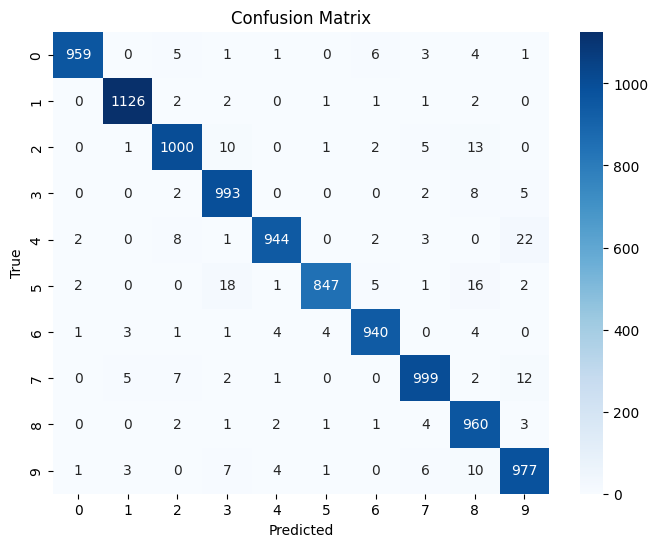

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels with your model
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as an image
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

### Test Data

1/1 [==============================] - 0s 31ms/step


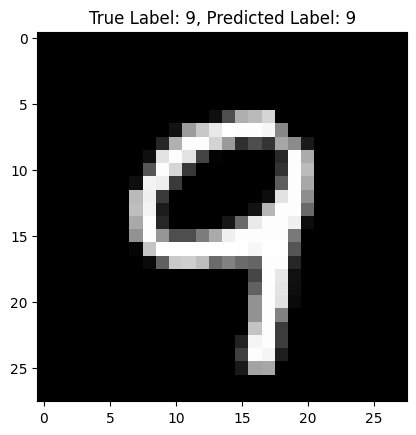

In [22]:
# Pilih indeks data pengujian acak
index = np.random.randint(0, len(x_test))

# Ambil satu gambar dari data pengujian
test_image = x_test[index]
true_label = y_test[index]

# Lakukan prediksi dengan model
predicted_label = model.predict(test_image.reshape(1, -1))
predicted_label = np.argmax(predicted_label)

# Plot gambar dan tampilkan prediksi serta label sebenarnya
plt.figure()
plt.imshow(test_image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()